<a href="https://colab.research.google.com/github/muga01/python_basics/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK01 - Introduction and EDA

Several of your friends live in Poland and are offered jobs at a US company with many locations all across the country. The job offers are great but news with headlines such as “America is one of 6 countries that make up more than half of guns deaths worldwide” have them worried.

You want to convince your friends that the US is a large and diverse country with 50 very different states as well as the District of Columbia (DC). Use data from the US gun violence dataset.

Problems and Questions:

1) What is the state with the most murders? Would you say this is the most dangerous state? Hint: Make a plot showing the relationship between population size (search for current data) and number of murders.

2) Create new csv dataset with the following structure:

a) Column 1: state

b) Column 2: population

c) Column 3: murders_total

d) Column 4: murder_rate

3) Describe the distribution of murder rates across states. How similar are states? How much do murder rates vary by geographical regions? Provide conclusions and recommendations for your friends.

Data sources.

US gun violence dataset: https://raw.githubusercontent.com/muga01/data_science/main/data/guns.csv

Population data: https://raw.githubusercontent.com/muga01/data_science/main/data/usa_pop_2019.csv 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!curl -O 'https://raw.githubusercontent.com/muga01/data_science/main/data/guns.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.1M  100 18.1M    0     0  34.2M      0 --:--:-- --:--:-- --:--:-- 34.1M


In [4]:
!curl -O 'https://raw.githubusercontent.com/muga01/data_science/main/data/usa_pop_2019.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1073  100  1073    0     0   6463      0 --:--:-- --:--:-- --:--:--  6463


In [5]:
gun_violance = pd.read_csv('https://raw.githubusercontent.com/muga01/data_science/main/data/guns.csv',encoding='latin-1')
np.count_nonzero(gun_violance['state'].unique())

51

In [6]:
population_data = pd.read_csv('https://raw.githubusercontent.com/muga01/data_science/main/data/usa_pop_2019.csv')
population_data

,state,population
0,Alabama,4903185.0
1,Alaska,731545.0
2,Arizona,7278717.0
3,Arkansas,3017804.0
4,California,39512223.0
5,Colorado,5758736.0
6,Connecticut,3565287.0
7,Delaware,973764.0
8,District of Columbia,705749.0
9,Florida,21477737.0


In [7]:
dataset = pd.merge(gun_violance ,population_data)
dataset.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,latitude,longitude,population
0,461105,1/1/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,40.3467,-79.8559,12801989.0
1,484268,4/9/2013,Pennsylvania,Philadelphia,Somerset Street and Lee Street,1,3,39.9924,-75.1300,12801989.0
2,485885,4/28/2013,Pennsylvania,Chester,Rose and Upland Street,1,3,39.8564,-75.3587,12801989.0
3,486068,5/6/2013,Pennsylvania,Johnstown,Horner and Messenger streets,0,4,40.3091,-78.9124,12801989.0
4,486121,5/11/2013,Pennsylvania,Philadelphia,21st Street and Medary Avenue,0,4,40.0505,-75.1554,12801989.0


In [8]:
dataset[dataset['state']=='Alabama'].describe()


,incident_id,n_killed,n_injured,latitude,longitude,population
count,5.471000e+03,5471.000000,5471.000000,5374.000000,5374.000000,5471.0
mean,5.583235e+05,0.343630,0.547980,32.979917,-86.822790,4903185.0
std,3.056562e+05,0.547218,0.724998,1.304998,0.760415,0.0
min,9.222100e+04,0.000000,0.000000,30.232000,-88.393200,4903185.0
25%,2.835135e+05,0.000000,0.000000,32.334100,-87.074225,4903185.0
50%,5.482960e+05,0.000000,0.000000,33.419350,-86.781700,4903185.0
75%,8.343180e+05,1.000000,1.000000,33.653975,-86.336550,4903185.0
max,1.083224e+06,5.000000,12.000000,34.995800,-84.995200,4903185.0


In [49]:
murdered = dataset.groupby('state')['n_killed'].sum().sort_values(ascending=False)
#plt.scatter(murdered,population_data['population'])
#plt.grid()
murdered.head()

state
California    5562
Texas         5046
Florida       3909
Illinois      3409
Ohio          2508
Name: n_killed, dtype: int64

In [10]:
population_data['state']
population_data['population']

0      4903185.0
1       731545.0
2      7278717.0
3      3017804.0
4     39512223.0
5      5758736.0
6      3565287.0
7       973764.0
8       705749.0
9     21477737.0
10    10617423.0
11     1415872.0
12     1787065.0
13    12671821.0
14     6732219.0
15     3155070.0
16     2913314.0
17     4467673.0
18     4648794.0
19     1344212.0
20     6045680.0
21     6892503.0
22     9986857.0
23     5639632.0
24     2976149.0
25     6137428.0
26     1068778.0
27     1934408.0
28     3080156.0
29     1359711.0
30     8882190.0
31     2096829.0
32    19453561.0
33    10488084.0
34      762062.0
35    11689100.0
36     3956971.0
37     4217737.0
38    12801989.0
39     1059361.0
40     5148714.0
41      884659.0
42     6829174.0
43    28995881.0
44     3205958.0
45      623989.0
46     8535519.0
47     7614893.0
48     1792147.0
49     5822434.0
50      578759.0
Name: population, dtype: float64

In [16]:
{ 'state': population_data['state'],
                         'population':population_data['population'],
                         'murders_total': murdered,
                         'murder_rate': murdered/population_data['population']}

In [22]:
new_data_1 = pd.DataFrame({ 'state': population_data['state'],
                         'population':population_data['population'],
                         'murders_total': murdered.values,
                         'murder_rate': murdered.values/population_data['population']})
new_data_1

,state,population,murders_total,murder_rate
0,Alabama,4903185.0,5562,0.001134
1,Alaska,731545.0,5046,0.006898
2,Arizona,7278717.0,3909,0.000537
3,Arkansas,3017804.0,3409,0.001130
4,California,39512223.0,2508,0.000063
5,Colorado,5758736.0,2456,0.000426
6,Connecticut,3565287.0,2395,0.000672
7,Delaware,973764.0,2225,0.002285
8,District of Columbia,705749.0,2179,0.003087
9,Florida,21477737.0,2136,0.000099


In [41]:
new_data = pd.DataFrame()
new_data['state']=population_data['state']
new_data['population'] = population_data['population']
new_data['murders_total'] = dataset.groupby('state')['n_killed'].sum().values
new_data['murder_rate'] = dataset.groupby('state')['n_killed'].sum().values/population_data['population']
new_data.head()

,state,population,murders_total,murder_rate
0,Alabama,4903185.0,1880,0.000383
1,Alaska,731545.0,267,0.000365
2,Arizona,7278717.0,1094,0.000150
3,Arkansas,3017804.0,773,0.000256
4,California,39512223.0,5562,0.000141


In [32]:
new_data.to_csv('merged_data.csv',index=False)

In [27]:
df = pd.read_csv('merged_data.csv')
df.head()

,state,population,murders_total,murder_rate
0,Alabama,4903185.0,5562,0.001134
1,Alaska,731545.0,5046,0.006898
2,Arizona,7278717.0,3909,0.000537
3,Arkansas,3017804.0,3409,0.001130
4,California,39512223.0,2508,0.000063


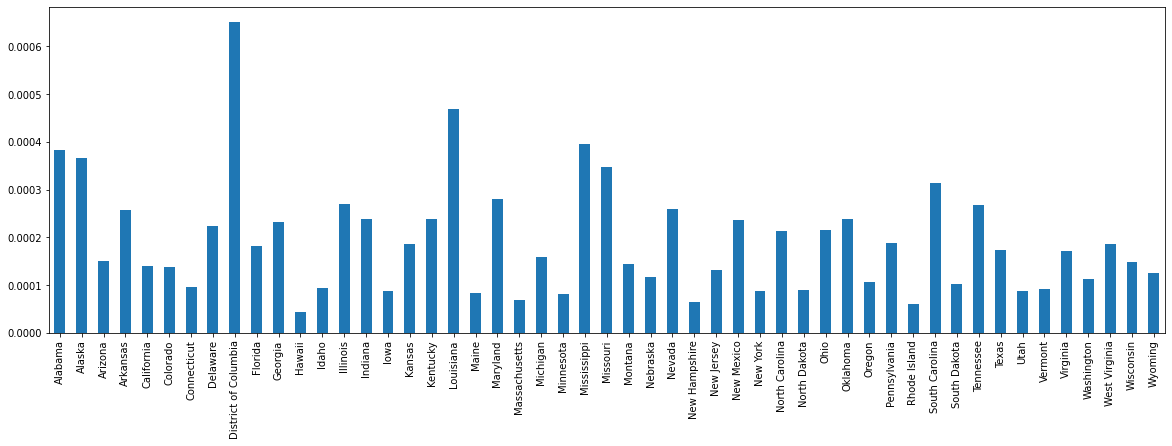

In [48]:
fig = plt.figure(figsize=(20,6))
#new_data.index= new_data['state']
new_data['murder_rate'].plot(kind='bar')
_=plt.xticks(ticks=new_data.index,labels=new_data['state'])


In [13]:
dataset.groupby('state')['n_injured'].sum().sort_values(ascending=False)

state
Illinois                13514
California               7644
Florida                  7072
Texas                    6106
Ohio                     5703
New York                 5059
Pennsylvania             5056
North Carolina           4629
Tennessee                4478
Louisiana                4398
Georgia                  4056
Missouri                 3585
Virginia                 3566
Maryland                 3167
South Carolina           3084
Alabama                  2998
Michigan                 2990
Indiana                  2956
New Jersey               2540
Wisconsin                2117
Kentucky                 1894
Mississippi              1883
Massachusetts            1701
Oklahoma                 1550
District of Columbia     1415
Arkansas                 1347
Washington               1287
Connecticut              1258
Colorado                 1133
Arizona                  1096
Nevada                    951
Kansas                    931
Minnesota                 916
Dela

In [14]:
dataset.groupby('state')['population','n_killed'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,population,n_killed
state,,
Alabama,4903185.0,5
Alaska,731545.0,4
Arizona,7278717.0,5
Arkansas,3017804.0,4
California,39512223.0,16
Colorado,5758736.0,4
Connecticut,3565287.0,2
Delaware,973764.0,3
District of Columbia,705749.0,11


2) Create new csv dataset with the following structure:

a) Column 1: state

b) Column 2: population

c) Column 3: murders_total

d) Column 4: murder_rate

In [15]:
dataset.pivot_table('n_killed',index = 'incident_id',columns=['state','population'],margins=True,margins_name='murders_total').T.head()

,incident_id,92114,92117,92119,92122,92125,92129,92131,92133,92135,92137,92139,92142,92144,92148,92151,92153,92156,92158,92160,92162,92165,92168,92174,92177,92180,92183,92186,92189,92194,92197,92200,92202,92204,92207,92209,92211,92213,92215,92218,92221,...,1083028,1083045,1083060,1083063,1083070,1083102,1083113,1083121,1083134,1083136,1083139,1083142,1083146,1083151,1083157,1083162,1083218,1083224,1083233,1083243,1083251,1083273,1083286,1083296,1083325,1083341,1083344,1083347,1083349,1083379,1083389,1083390,1083396,1083413,1083428,1083435,1083457,1083466,1083472,murders_total
state,population,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4903185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.343630
Alaska,731545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.197924
Arizona,7278717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.469931
Arkansas,3017804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.271992
California,39512223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341101
